In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import tensorflow
import keras_tuner
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Input,LSTM,GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r"C:\Users\BrunoNad\Downloads\Dataset Fuel Oil(Tabelle1).csv",sep=";")
data

,Timestamp,latitude,longitude,Unnamed: 3,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft speed PS [%],Shaft RPM PS [rpm],Shaft speed SB [%],...,Shaft Torque SB [kNm],Unnamed: 17,Unnamed: 18,Timestamp.2,Wind Speed [m/s],Unnamed: 21,Unnamed: 22,Timestamp.3,Fuel Consumpt. (TOTAL) [l/h],Electr. Consumpt. (TOTAL) [kW]
0,29.8.2025 22:30,"54,25","7,224167",NaN,29.8.2025 22:30,"9,4","229,8","62,6","140,2","53,9",...,"106,7",NaN,NaN,29.8.2025 22:30,"7,2",NaN,NaN,29.8.2025 21:30,"275,5",910.0
1,29.8.2025 22:33,"54,244168","7,210278",NaN,29.8.2025 22:32,"12,9","230,2","78,8","176,5","77,2",...,"223,1",NaN,NaN,29.8.2025 22:35,"13,4",NaN,NaN,29.8.2025 21:35,"244,1",893.0
2,29.8.2025 22:36,"54,232224","7,2",NaN,29.8.2025 22:34,"16,1","214,5","89,5","200,5","88,2",...,"272,3",NaN,NaN,29.8.2025 22:40,"10,2",NaN,NaN,29.8.2025 21:40,"247,9",934.0
3,29.8.2025 22:39,"54,216668","7,200556",NaN,29.8.2025 22:36,"18,1","179,3","99,9","223,8","99,8",...,"363,3",NaN,NaN,29.8.2025 22:45,"10,6",NaN,NaN,29.8.2025 21:45,"239,7",868.0
4,29.8.2025 22:42,"54,201388","7,201945",NaN,29.8.2025 22:38,19,"177,4","99,9","223,8","99,9",...,"338,2",NaN,NaN,29.8.2025 22:50,"8,9",NaN,NaN,29.8.2025 21:50,"238,9",859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data=data.iloc[:,[0,1,2,4,5,6,8,10,11,12,14,16,19,20,23,24,25]]
data

,Timestamp,latitude,longitude,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Timestamp.2,Wind Speed [m/s],Timestamp.3,Fuel Consumpt. (TOTAL) [l/h],Electr. Consumpt. (TOTAL) [kW]
0,29.8.2025 22:30,"54,25","7,224167",29.8.2025 22:30,"9,4","229,8","140,2","120,7",1160.0,646.0,"159,4","106,7",29.8.2025 22:30,"7,2",29.8.2025 21:30,"275,5",910.0
1,29.8.2025 22:33,"54,244168","7,210278",29.8.2025 22:32,"12,9","230,2","176,5","172,9",2266.0,2048.0,"241,0","223,1",29.8.2025 22:35,"13,4",29.8.2025 21:35,"244,1",893.0
2,29.8.2025 22:36,"54,232224","7,2",29.8.2025 22:34,"16,1","214,5","200,5","197,6",3085.0,2889.0,"285,7","272,3",29.8.2025 22:40,"10,2",29.8.2025 21:40,"247,9",934.0
3,29.8.2025 22:39,"54,216668","7,200556",29.8.2025 22:36,"18,1","179,3","223,8","223,6",4218.0,4386.0,"348,0","363,3",29.8.2025 22:45,"10,6",29.8.2025 21:45,"239,7",868.0
4,29.8.2025 22:42,"54,201388","7,201945",29.8.2025 22:38,19,"177,4","223,8","223,8",4050.0,4086.0,"335,2","338,2",29.8.2025 22:50,"8,9",29.8.2025 21:50,"238,9",859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns = data.columns.str.strip()
data.columns

Index(['Timestamp', 'latitude', 'longitude', 'Timestamp.1',
       'Speed over Ground [knots]', 'Heading [degrees]', 'Shaft RPM PS  [rpm]',
       'Shaft RPM SB [rpm]', 'Shaft Power PS [kW]', 'Shaft Power SB  [kW]',
       'Shaft Torque PS  [kNm]', 'Shaft Torque SB [kNm]', 'Timestamp.2',
       'Wind Speed [m/s]', 'Timestamp.3', 'Fuel Consumpt. (TOTAL) [l/h]',
       'Electr. Consumpt. (TOTAL) [kW]'],
      dtype='object')

In [5]:
data1 = data[['Timestamp.1','Speed over Ground [knots]','Heading [degrees]','Shaft RPM PS  [rpm]',
               'Shaft RPM SB [rpm]','Shaft Power PS [kW]','Shaft Power SB  [kW]',
               'Shaft Torque PS  [kNm]','Shaft Torque SB [kNm]']]
data1=data1.dropna()
data1

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm]
0,29.8.2025 22:30,"9,4","229,8","140,2","120,7",1160.0,646.0,"159,4","106,7"
1,29.8.2025 22:32,"12,9","230,2","176,5","172,9",2266.0,2048.0,"241,0","223,1"
2,29.8.2025 22:34,"16,1","214,5","200,5","197,6",3085.0,2889.0,"285,7","272,3"
3,29.8.2025 22:36,"18,1","179,3","223,8","223,6",4218.0,4386.0,"348,0","363,3"
4,29.8.2025 22:38,19,"177,4","223,8","223,8",4050.0,4086.0,"335,2","338,2"
...,...,...,...,...,...,...,...,...,...
970,31.8.2025 6:50,0,"99,5","0,0","0,0",0.0,0.0,"0,0","0,0"
971,31.8.2025 6:52,0,"99,4","0,0","0,0",0.0,0.0,"0,0","0,0"
972,31.8.2025 6:54,0,"99,4","0,0","0,0",0.0,0.0,"0,0","0,0"
973,31.8.2025 6:56,0,"99,5","0,0","0,0",0.0,0.0,"0,0","0,0"


In [6]:
# choose every 5th row
data1=data1.iloc[::5].reset_index(drop=True)
data1

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm]
0,29.8.2025 22:30,"9,4","229,8","140,2","120,7",1160.0,646.0,"159,4","106,7"
1,29.8.2025 22:40,"19,1",177,"223,8","223,8",4009.0,4022.0,"330,9","332,3"
2,29.8.2025 22:50,"16,2","176,9","189,5","189,3",2393.0,2475.0,"236,2","245,3"
3,29.8.2025 23:00,14,"134,2","106,8","106,0",27.0,91.0,"12,0","23,3"
4,29.8.2025 23:10,"4,1","104,3","120,1","117,6",928.0,833.0,"150,3","138,7"
...,...,...,...,...,...,...,...,...,...
190,31.8.2025 6:10,"0,3","102,9","41,9","44,6",41.0,50.0,"22,6","25,5"
191,31.8.2025 6:20,0,"99,1","24,0","31,4",5.0,14.0,"7,3","11,6"
192,31.8.2025 6:30,0,"99,4","17,2","15,0",0.0,0.0,"2,2","-0,4"
193,31.8.2025 6:40,0,"99,4","15,0","15,0",0.0,0.0,"0,4","-1,8"


In [7]:
# type object -> type float 
for col in data1.columns[1:]:
    if data1[col].dtype == 'object':
        data1[col] = pd.to_numeric(data1[col].str.replace(',', '.'), errors='coerce')

In [8]:
data1['Timestamp.1'] = pd.to_datetime(data1['Timestamp.1'], format='%d.%m.%Y %H:%M')
data1

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm]
0,2025-08-29 22:30:00,9.4,229.8,140.2,120.7,1160.0,646.0,159.4,106.7
1,2025-08-29 22:40:00,19.1,177.0,223.8,223.8,4009.0,4022.0,330.9,332.3
2,2025-08-29 22:50:00,16.2,176.9,189.5,189.3,2393.0,2475.0,236.2,245.3
3,2025-08-29 23:00:00,14.0,134.2,106.8,106.0,27.0,91.0,12.0,23.3
4,2025-08-29 23:10:00,4.1,104.3,120.1,117.6,928.0,833.0,150.3,138.7
...,...,...,...,...,...,...,...,...,...
190,2025-08-31 06:10:00,0.3,102.9,41.9,44.6,41.0,50.0,22.6,25.5
191,2025-08-31 06:20:00,0.0,99.1,24.0,31.4,5.0,14.0,7.3,11.6
192,2025-08-31 06:30:00,0.0,99.4,17.2,15.0,0.0,0.0,2.2,-0.4
193,2025-08-31 06:40:00,0.0,99.4,15.0,15.0,0.0,0.0,0.4,-1.8


In [9]:
data_wind=data['Wind Speed [m/s]'].dropna()
data_wind=data_wind.iloc[::2].reset_index(drop=True)
data_wind=pd.to_numeric(data_wind.str.replace(',', '.'))
data_wind

0       7.2
1      10.2
2       8.9
3       9.7
4       7.9
       ... 
190     4.2
191     4.3
192     4.8
193     5.0
194     4.8
Name: Wind Speed [m/s], Length: 195, dtype: float64

In [10]:
data_fuel=data['Fuel Consumpt. (TOTAL) [l/h]'].dropna()
data_fuel=pd.to_numeric(data_fuel.str.replace(',', '.'))
data_fuel=data_fuel[12:].reset_index().drop('index',axis=1)
data_fuel=data_fuel.iloc[::2].reset_index(drop=True)
data_fuel

,Fuel Consumpt. (TOTAL) [l/h]
0,677.1
1,2435.5
2,1508.9
3,705.7
4,632.3
...,...
190,248.0
191,217.6
192,204.7
193,215.7


In [11]:
table=pd.concat([data1,data_wind,data_fuel],axis=1)
table

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Wind Speed [m/s],Fuel Consumpt. (TOTAL) [l/h]
0,2025-08-29 22:30:00,9.4,229.8,140.2,120.7,1160.0,646.0,159.4,106.7,7.2,677.1
1,2025-08-29 22:40:00,19.1,177.0,223.8,223.8,4009.0,4022.0,330.9,332.3,10.2,2435.5
2,2025-08-29 22:50:00,16.2,176.9,189.5,189.3,2393.0,2475.0,236.2,245.3,8.9,1508.9
3,2025-08-29 23:00:00,14.0,134.2,106.8,106.0,27.0,91.0,12.0,23.3,9.7,705.7
4,2025-08-29 23:10:00,4.1,104.3,120.1,117.6,928.0,833.0,150.3,138.7,7.9,632.3
...,...,...,...,...,...,...,...,...,...,...,...
190,2025-08-31 06:10:00,0.3,102.9,41.9,44.6,41.0,50.0,22.6,25.5,4.2,248.0
191,2025-08-31 06:20:00,0.0,99.1,24.0,31.4,5.0,14.0,7.3,11.6,4.3,217.6
192,2025-08-31 06:30:00,0.0,99.4,17.2,15.0,0.0,0.0,2.2,-0.4,4.8,204.7
193,2025-08-31 06:40:00,0.0,99.4,15.0,15.0,0.0,0.0,0.4,-1.8,5.0,215.7


In [12]:
table.describe()

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Wind Speed [m/s],Fuel Consumpt. (TOTAL) [l/h]
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2025-08-30 14:40:00.000000256,7.534359,163.041026,104.436410,106.833333,1021.435897,1028.512821,113.766154,116.636410,9.162564,793.458462
min,2025-08-29 22:30:00,0.000000,12.900000,-122.300000,-122.300000,-64.000000,-55.000000,-94.600000,-90.600000,3.500000,163.300000
25%,2025-08-30 06:35:00,0.400000,106.950000,50.950000,51.500000,75.000000,79.500000,32.950000,34.050000,7.250000,314.350000
50%,2025-08-30 14:40:00,5.800000,167.600000,85.300000,85.100000,273.000000,278.000000,61.900000,71.700000,9.700000,391.800000
75%,2025-08-30 22:45:00,13.500000,200.600000,163.200000,163.100000,1576.500000,1547.000000,184.350000,181.100000,10.900000,1087.650000
max,2025-08-31 06:50:00,19.300000,358.100000,223.800000,223.800000,4009.000000,4022.000000,330.900000,332.300000,20.900000,2435.500000
std,NaN,7.148333,62.647859,70.023683,67.895412,1314.189821,1303.873165,110.006520,108.021078,2.598073,698.196658


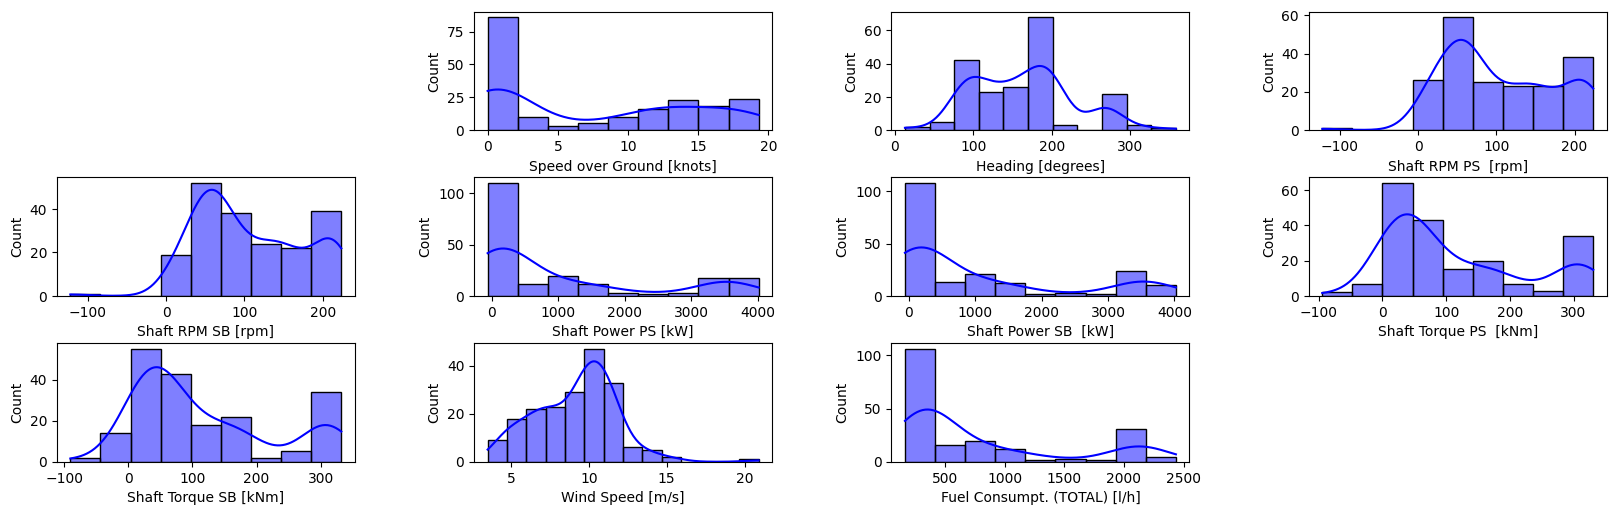

In [30]:
fig=plt.figure(figsize=[20,8])
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(2,len(table.columns)+1):
    ax=fig.add_subplot(4,4,i)
    sns.histplot(data=table,x=table[table.columns[i-1]],kde=True,color="b")
plt.show()

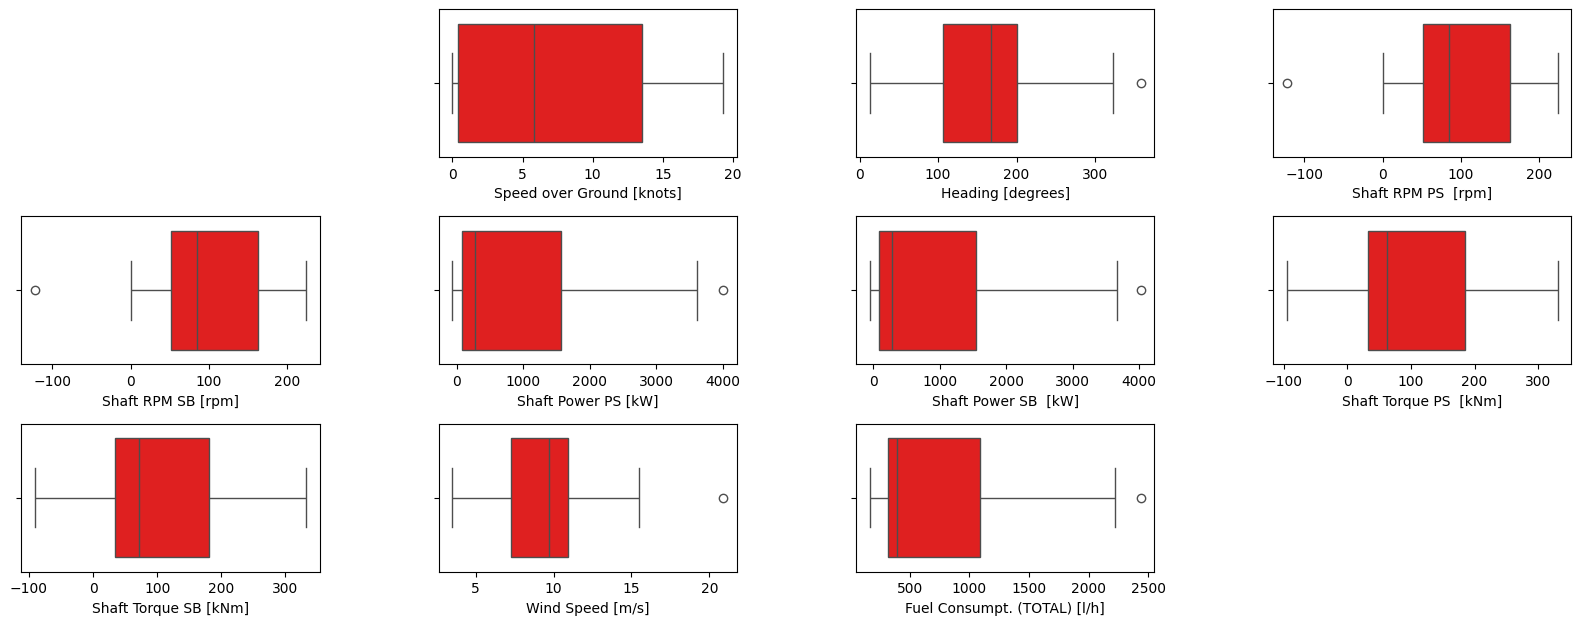

In [31]:
fig = plt.figure(figsize=[20,10])
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2,len(table.columns)+1):
    ax = fig.add_subplot(4,4,i)
    sns.boxplot(x=table[table.columns[i-1]],color="red")
plt.show()

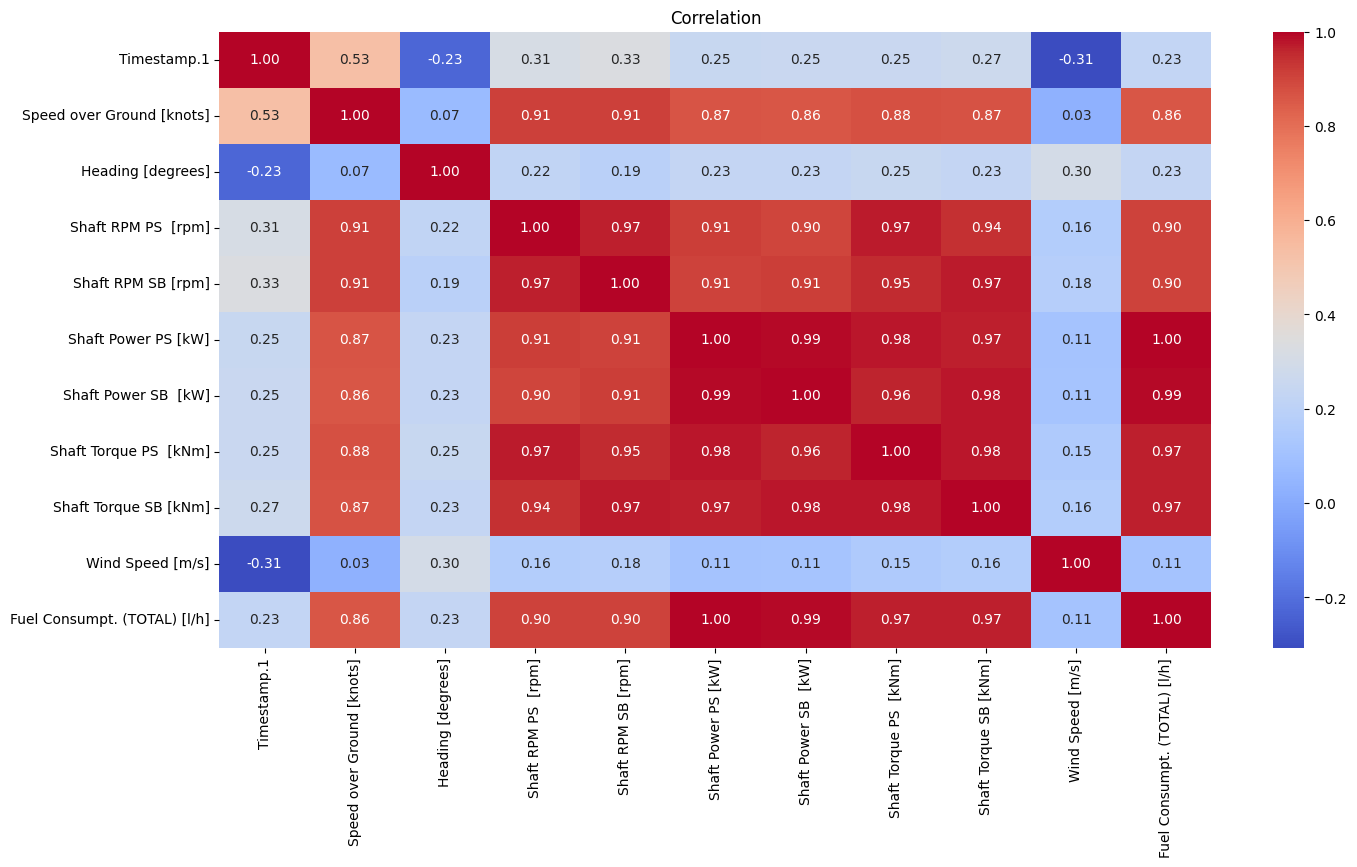

In [32]:
plt.figure(figsize=[16,8])
sns.heatmap(table.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correlation")
plt.show()

In [72]:
def add_lags_target(df,target_column,lag_steps):
    for i in range(1,lag_steps+1):
        df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
    return df

In [73]:
table=add_lags_target(table,'Fuel Consumpt. (TOTAL) [l/h]',3).dropna().reset_index(drop=True)
table

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Wind Speed [m/s],Fuel Consumpt. (TOTAL) [l/h],Fuel Consumpt. (TOTAL) [l/h]_lag_1,Fuel Consumpt. (TOTAL) [l/h]_lag_2,Fuel Consumpt. (TOTAL) [l/h]_lag_3
0,2025-08-29 23:00:00,14.0,134.2,106.8,106.0,27.0,91.0,12.0,23.3,9.7,705.7,1508.9,2435.5,677.1
1,2025-08-29 23:10:00,4.1,104.3,120.1,117.6,928.0,833.0,150.3,138.7,7.9,632.3,705.7,1508.9,2435.5
2,2025-08-29 23:20:00,0.4,88.9,69.9,76.4,218.0,291.0,66.2,77.9,7.9,408.3,632.3,705.7,1508.9
3,2025-08-29 23:30:00,0.1,89.3,33.2,34.0,23.0,0.0,14.9,3.6,7.6,294.6,408.3,632.3,705.7
4,2025-08-29 23:40:00,0.5,74.7,19.5,67.9,0.0,127.0,4.7,42.6,6.5,290.9,294.6,408.3,632.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2025-08-31 06:10:00,0.3,102.9,41.9,44.6,41.0,50.0,22.6,25.5,4.2,248.0,228.7,207.4,308.0
188,2025-08-31 06:20:00,0.0,99.1,24.0,31.4,5.0,14.0,7.3,11.6,4.3,217.6,248.0,228.7,207.4
189,2025-08-31 06:30:00,0.0,99.4,17.2,15.0,0.0,0.0,2.2,-0.4,4.8,204.7,217.6,248.0,228.7
190,2025-08-31 06:40:00,0.0,99.4,15.0,15.0,0.0,0.0,0.4,-1.8,5.0,215.7,204.7,217.6,248.0


In [14]:
X=table.drop(['Timestamp.1','Fuel Consumpt. (TOTAL) [l/h]'],axis=1)
y=table['Fuel Consumpt. (TOTAL) [l/h]']

In [15]:
# Train-valid-test split
train_end = int(X.shape[0] * 0.7)
val_end = int(X.shape[0] * 0.85)
Xtrain=X[:train_end]
Xvalid=X[train_end:val_end]
Xtest=X[val_end:]
ytrain=y[:train_end]
yvalid=y[train_end:val_end]
ytest=y[val_end:]

In [37]:
#Train-test split
train_end=int(X.shape[0]*0.7)
Xtrain=X[:train_end]
ytrain=y[:train_end]
Xtest=X[train_end:]
ytest=y[train_end:]

# Linear Regression

In [38]:
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
predlr=lr.predict(Xtest)

In [41]:
print("MAE: ",mean_absolute_error(predlr,ytest),"\t MSE: ",mean_squared_error(predlr,ytest),"\t MAPE: ",round(mean_absolute_percentage_error(predlr,ytest)*100,2),"%")

MAE:  52.3164877337352 	 MSE:  4009.894725038015 	 MAPE:  8.96 %


In [42]:
pd.DataFrame({'actual':ytest,'predicted':predlr,'error':abs(ytest-predlr)})

,actual,predicted,error
134,2150.8,2117.065157,33.734843
135,2154.9,2128.546989,26.353011
136,2173.9,2141.763944,32.136056
137,2156.4,2113.681339,42.718661
138,2151.7,2129.055180,22.644820
139,2143.6,2079.099142,64.500858
140,1106.3,1070.006766,36.293234
141,1086.2,1093.593687,7.393687
142,1089.1,1034.645244,54.454756
143,1101.6,1079.928836,21.671164


In [43]:
pd.DataFrame({'column':Xtrain.columns,'coefficient':lr.coef_})

,column,coefficient
0,Speed over Ground [knots],-3.992899
1,Heading [degrees],0.042407
2,Shaft RPM PS [rpm],0.788859
3,Shaft RPM SB [rpm],1.489865
4,Shaft Power PS [kW],0.516371
5,Shaft Power SB [kW],0.139464
6,Shaft Torque PS [kNm],-1.604514
7,Shaft Torque SB [kNm],-1.000103
8,Wind Speed [m/s],-1.503992
9,Fuel Consumpt. (TOTAL) [l/h]_lag_1,-0.028767


In [44]:
lr.intercept_

np.float64(241.1713684600511)

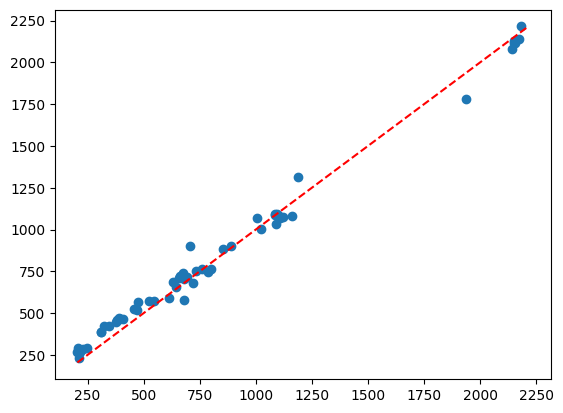

In [45]:
min_val = min(min(ytest), min(predlr))
max_val = max(max(ytest), max(predlr))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest,predlr)
plt.plot(x, y, color='red', linestyle='--')
plt.show()

# XGBoost

In [85]:
Xtrain.columns = Xtrain.columns.str.replace(r'[\[\]<>\{\}]', '', regex=True)
Xvalid.columns = Xvalid.columns.str.replace(r'[\[\]<>\{\}]', '', regex=True)
Xtest.columns = Xtest.columns.str.replace(r'[\[\]<>\{\}]', '', regex=True)

In [86]:
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dval = xgb.DMatrix(Xvalid, label=yvalid)
dtest = xgb.DMatrix(Xtest, label=ytest)

In [87]:
param_grid = {
    'learning_rate':[i/100 for i in range(1,21,1)],
    'max_depth': [3,4,5,10,15],
    'subsample': [0.8,0.9]
}

In [88]:
best_mae = float('inf')
best_params = {}
best_num_round = 0

for lr in param_grid['learning_rate']:
    for depth in param_grid['max_depth']:
        for subsample in param_grid['subsample']:
            params = {
                'objective': 'reg:squarederror',
                'learning_rate': lr,
                'max_depth': depth,
                'subsample': subsample,
                'eval_metric': 'mae'
            }
            model = xgb.train(
                params,
                dtrain,
                num_boost_round=2000,
                evals=[(dval, 'val')],
                early_stopping_rounds=50,
                verbose_eval=False
            )
            best_iter = model.best_iteration
            val_preds = model.predict(dval, iteration_range=(0, best_iter))
            current_mae = mean_absolute_error(yvalid, val_preds)
            
            if current_mae < best_mae:
                best_mae = current_mae
                best_params = params.copy()
                best_num_round = best_iter

In [89]:
print("Best parameters: ",best_params)
print("Optimal number of rounds: ",best_num_round)

Best parameters:  {'objective': 'reg:squarederror', 'learning_rate': 0.17, 'max_depth': 15, 'subsample': 0.9, 'eval_metric': 'mae'}
Optimal number of rounds:  67


In [90]:
XGB= xgb.train(
    best_params,
    xgb.DMatrix(np.concatenate([Xtrain, Xvalid]), label=np.concatenate([ytrain, yvalid])),
    num_boost_round=best_num_round
)

In [91]:
print("MAE: ",mean_absolute_error(ytest, XGB.predict(dtest)),"\n MSE: ",mean_squared_error(ytest,XGB.predict(dtest)),"\n MAPE: ",round(mean_absolute_percentage_error(ytest,XGB.predict(dtest))*100,2),"%")

MAE:  61.38099859829607 
 MSE:  5867.802230741369 
 MAPE:  17.66 %


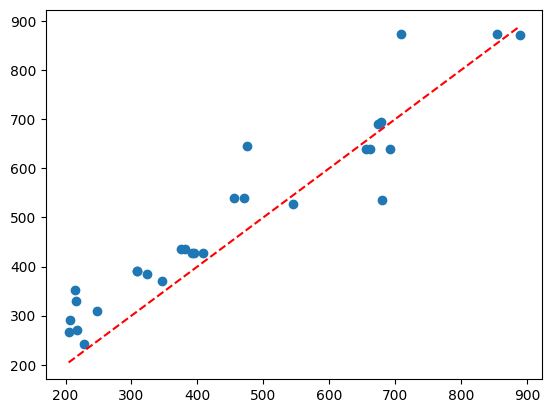

In [92]:
min_val = min(min(ytest), min(XGB.predict(dtest).flatten()))
max_val = max(max(ytest), max(XGB.predict(dtest).flatten()))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest,XGB.predict(dtest).flatten())
plt.plot(x, y, color='red', linestyle='--')
plt.show()

In [93]:
pd.DataFrame({'actual':ytest,'predicted':XGB.predict(dtest).flatten(),'error':abs(ytest-XGB.predict(dtest).flatten())})

,actual,predicted,error
163,545.0,526.813232,18.186768
164,470.8,539.060120,68.260120
165,456.2,538.521484,82.321484
166,394.5,427.114349,32.614349
167,391.8,427.653015,35.853015
168,409.0,427.180115,18.180115
169,374.6,435.257721,60.657721
170,381.0,435.578949,54.578949
171,346.2,370.355652,24.155652
172,309.0,390.941986,81.941986


# Neural Network

In [19]:
scaler = StandardScaler()

In [20]:
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xvalid_scaled = scaler.transform(Xvalid)
Xtest_scaled=scaler.transform(Xtest)

In [21]:
def cs(data, window_size):
    X = []
    for i in range(len(data) - window_size + 1):
        X.append(data[i:i+window_size])
    return np.array(X)

In [22]:
ws = 3
Xtrain_seq = cs(Xtrain_scaled, ws)
Xvalid_seq = cs(Xvalid_scaled, ws)
Xtest_seq = cs(Xtest_scaled, ws)

In [23]:
ytrain_adj = ytrain[ws-1:].reset_index(drop=True)
yvalid_adj = yvalid[ws-1:].reset_index(drop=True)
ytest_adj = ytest[ws-1:].reset_index(drop=True)

In [ ]:
# nn5
model = Sequential([
    GRU(64, kernel_regularizer=l2(0.1), return_sequences=True, activation='relu',input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),
    GRU(32, kernel_regularizer=l2(0.1), return_sequences=True, activation='relu'),                   
    GRU(16, kernel_regularizer=l2(0.01),activation='relu'),                                                    
    Dense(1, activation='linear')                       
])



# MAE:  52.399107360839835 	 
# MSE:  3865.7532223120606 	 
# MAPE:  14.12 %
# r2 score: 0.9106880558013802

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# nn6
model = Sequential([
    GRU(128, kernel_regularizer=l2(0.01), return_sequences=True, activation='relu',input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),
    GRU(32, kernel_regularizer=l2(0.01), return_sequences=True, activation='relu'),                   
    GRU(16, kernel_regularizer=l2(0.01),activation='relu'),                                                    
    Dense(1, activation='linear')                       
])

# MAE:  45.770620727539054 	 
# MSE:  3066.043519896556 	 
# MAPE:  13.16 %
# r2 score: 0.9234739577665183

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [473]:
model = Sequential([
    GRU(64, kernel_regularizer=l2(0.01),kernel_initializer='he_normal',return_sequences=True, activation='relu',input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),
    GRU(32, kernel_regularizer=l2(0.1),kernel_initializer='he_normal',return_sequences=True, activation='relu'),       
    GRU(32, kernel_regularizer=l2(0.1),kernel_initializer='he_normal',return_sequences=True, activation='relu'),                
    GRU(32, kernel_regularizer=l2(0.1),kernel_initializer='he_normal', activation='relu'),                                                    
    Dense(1, activation='linear')])                     

In [474]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [475]:
history = model.fit(Xtrain_seq, ytrain_adj,epochs=400,batch_size=32,validation_data=(Xvalid_seq, yvalid_adj),callbacks=[EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True,mode='min')],verbose=0)

In [471]:
r2_score(model.predict(Xtest_seq),ytest_adj)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


0.874621639364096

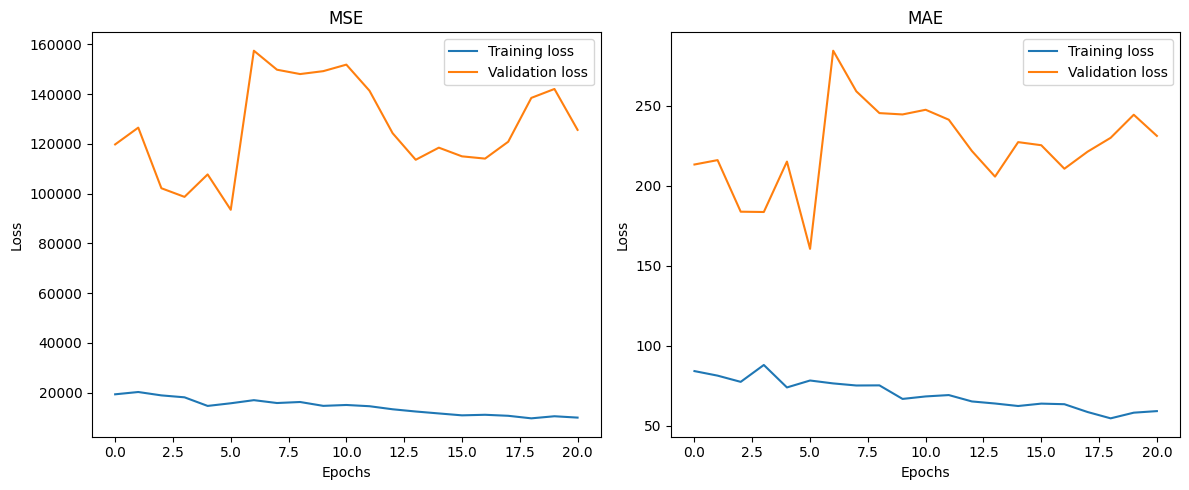

In [466]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training loss')
plt.plot(history.history['val_mae'], label='Validation loss')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plt.savefig("C:/Users/BrunoNad/Documents/Project_consumption/curve_loss_nn6")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


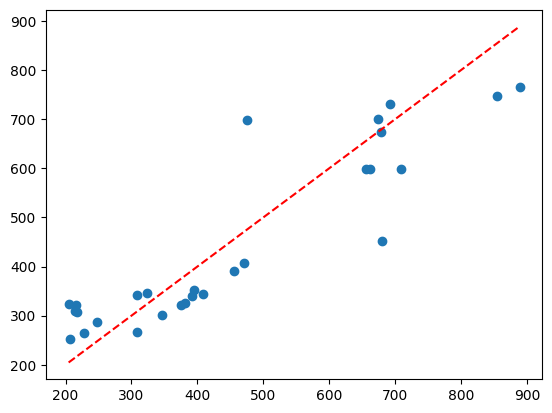

In [456]:
min_val = min(min(ytest_adj), min(model.predict(Xtest_seq).flatten()))
max_val = max(max(ytest_adj), max(model.predict(Xtest_seq).flatten()))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest_adj,model.predict(Xtest_seq).flatten())
plt.plot(x, y, color='red', linestyle='--')
plt.show()

In [457]:
pd.DataFrame({'actual':ytest_adj,'predicted':model.predict(Xtest_seq).flatten(),'diff':round(abs(model.predict(Xtest_seq).flatten()-ytest_adj),2)})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


,actual,predicted,diff
0,470.8,407.203461,63.60
1,456.2,391.718689,64.48
2,394.5,352.280121,42.22
3,391.8,339.886322,51.91
4,409.0,344.935455,64.06
5,374.6,321.542328,53.06
6,381.0,325.096497,55.90
7,346.2,301.818115,44.38
8,309.0,265.768219,43.23
9,708.1,598.825867,109.27


In [ ]:
#pd.DataFrame({'actual':ytest_adj,'predicted':model.predict(Xtest_seq).flatten(),'diff':round(abs(model.predict(Xtest_seq).flatten()-ytest_adj),2)}).to_csv('C:/Users/BrunoNad/Documents/Project_consumption/results_nn6.csv')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [458]:
print("MAE: ",mean_absolute_error(ytest_adj,model.predict(Xtest_seq)),"\t MSE: ",mean_squared_error(ytest_adj,model.predict(Xtest_seq)),"\t MAPE: ",round(mean_absolute_percentage_error(ytest_adj,model.predict(Xtest_seq))*100,2),"%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
MAE:  73.25718819754465 	 MSE:  8076.504200306464 	 MAPE:  19.21 %


In [327]:
model.save(r"C:/Users/BrunoNad/Documents/Project_consumption/nn6.keras")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(r"C:/Users/BrunoNad/Documents/Project_consumption/nn4.keras")

## Keras Tuner- BayesianOptimization

In [201]:
def build_model(hp):
    model = Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=5, step=1)
    for i in range(num_layers):
        units = hp.Int(f'units_{i}', min_value=8, max_value=512, step=16)
        return_seq = True if i < num_layers - 1 else False
        if i == 0:
            model.add(LSTM(units, return_sequences=return_seq, activation='relu', kernel_regularizer=l2(0.01),input_shape=(Xtrain_seq.shape[1], Xtrain_seq.shape[2])))                     
        else:
            model.add(LSTM(units,  activation='relu',kernel_regularizer=l2(0.01), return_sequences=return_seq))
    model.add(Dense(1,activation='linear'))
    learning_rate = hp.Float('lr', 1e-5, 1e-2, sampling='log')  
    model.compile(optimizer=keras.optimizers.Adam(learning_rate),loss='mse',metrics=['mae'])
    return model

In [203]:
tuner=keras_tuner.BayesianOptimization(hypermodel=build_model,objective='val_mae',max_trials=50,num_initial_points=15,beta=3)

In [204]:
tuner.search(Xtrain_seq,ytrain_adj,epochs=50,validation_data=(Xvalid_seq, yvalid_adj),callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_mae',patience=5,mode='min')],verbose=0)

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\BrunoNad\AppData\Local\Pr

In [205]:
best_hps = tuner.get_best_hyperparameters()[0]
print(f"""
Best parameters:
- Number of layers: {best_hps.get('num_layers')}
""")

for i in range(best_hps.get('num_layers')):
    units = best_hps.get(f'units_{i}')
    print(f"layer {i+1}: {units} neurons")


Best parameters:
- Number of layers: 5

layer 1: 504 neurons
layer 2: 504 neurons
layer 3: 504 neurons
layer 4: 472 neurons
layer 5: 8 neurons


In [206]:
nn = build_model(best_hps)

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [207]:
history=nn.fit(Xtrain_seq, ytrain_adj, epochs=400,batch_size=32, validation_data=(Xvalid_seq, yvalid_adj),verbose=0)

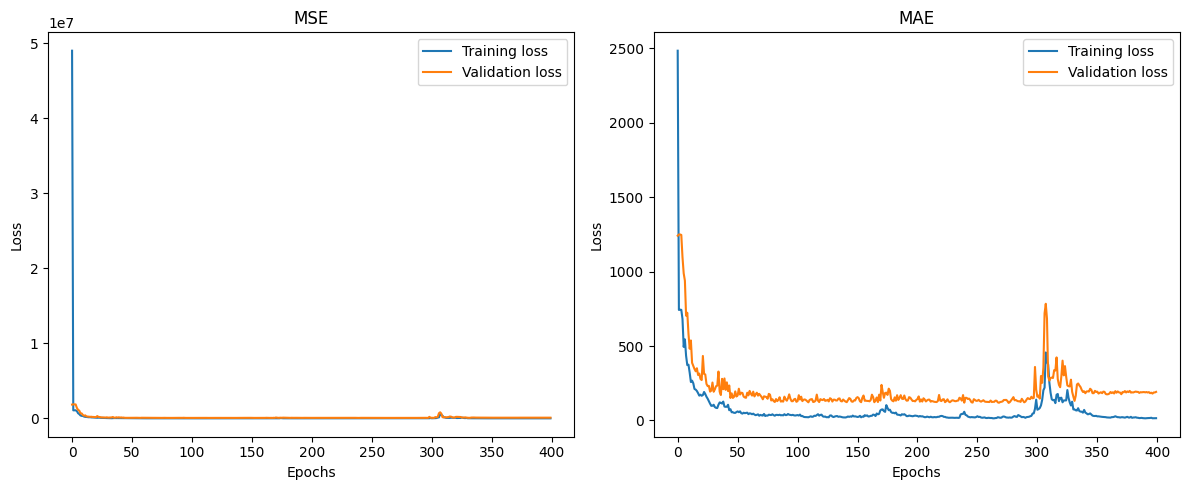

In [208]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training loss')
plt.plot(history.history['val_mae'], label='Validation loss')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("C:/Users/BrunoNad/Documents/Project_consumption/curve_loss_keras_tuner1.png")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


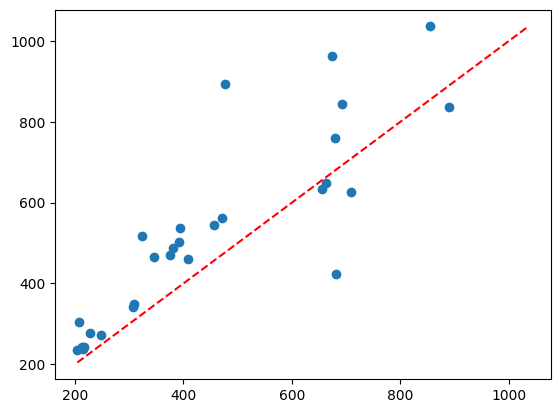

In [209]:
min_val = min(min(ytest_adj), min(nn.predict(Xtest_seq).flatten()))
max_val = max(max(ytest_adj), max(nn.predict(Xtest_seq).flatten()))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest_adj,nn.predict(Xtest_seq).flatten())
plt.plot(x, y, color='red', linestyle='--')
plt.show()

In [210]:
pd.DataFrame({'actual':ytest_adj,'predicted':nn.predict(Xtest_seq).flatten(),'diff':abs(nn.predict(Xtest_seq).flatten()-ytest_adj)})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


,actual,predicted,diff
0,470.8,561.112976,90.312976
1,456.2,544.759216,88.559216
2,394.5,537.455139,142.955139
3,391.8,503.657837,111.857837
4,409.0,460.809753,51.809753
5,374.6,469.865936,95.265936
6,381.0,488.793274,107.793274
7,346.2,466.123993,119.923993
8,309.0,348.348724,39.348724
9,708.1,626.991333,81.108667


In [211]:
print("MAE: ",mean_absolute_error(nn.predict(Xtest_seq).flatten(),ytest_adj),"\n MSE: ",mean_squared_error(nn.predict(Xtest_seq).flatten(),ytest_adj),"\n MAPE: ",round(mean_absolute_percentage_error(nn.predict(Xtest_seq).flatten(),ytest_adj)*100,2),"%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
MAE:  103.60873903547017 
 MSE:  19256.882707492146 
 MAPE:  18.96 %
